In [1]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web #(pip install pandas-datareader)

### 1) Print out the ticker for IBM from the list using indexing.

In [2]:
lst = [["AAPL","MSFT","IBM","FB"],["WMT","M","TGT"]]

In [3]:
print(lst[0][2])

IBM


### 2) Remove all zeros from the following list.

In [4]:
list1 = [12345, 51987, 0, 8495, 1, 0]

In [5]:
# USING FILTER FUNCTION:
list(filter(lambda item: item != 0, list1))

# # USING FOR LOOP:
# lst = []
# for i in list1:
#     if i != 0:
#         lst.append(i)
# lst

[12345, 51987, 8495, 1]

### 3) Use a ***for loop*** and an ***if statement*** to print out all words that start with 't' in the following string.

In [6]:
string = 'Use this string to print only the words that start with t'

In [7]:
for item in string.split():
    if item[0] == 't':
        print(item)

this
to
the
that
t


### 4) Define a function called "avg" that takes in a list of numbers and calculates the average. Use the function to calculate the average for the following list.

In [8]:
num_lst = [100, 15, 20, 45, 55]

In [9]:
def avg(lst):
    return sum(lst)/len(lst)

avg(num_lst)

47.0

### 5) Define a function that calculates the present value of a future amount. Parameters are the amount expected in the future, the number of years and the annual interest rate. Use the function to find the present value of 100,000, expected in 7 years, when the annual interest rate is 4%.

In [10]:
def pv(amt, years, rate):
    pv = amt/((1+rate)**years)
    return pv

pv(100000, 7, 0.04)

75991.78132020633

### 6) Define a function called "product" that calculates the product of the integers between 1 and X. Use the function to find the product of all integers between 1 and 10.

In [11]:
def product(X):
    prod = 1
    for i in range(1,X+1):
        prod = prod * i
    return prod

product(10)

3628800

# Pandas DataFrame Questions

In [12]:
# Creating DataFrame of stock prices from Yahoo Finance to be used for the below Questions
stock_lst = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 1, 1)
prices = pd.DataFrame()
for ticker in stock_lst:
    prices['PRC_'+ticker] = web.DataReader(ticker, 'yahoo', start, end)['Adj Close']

In [13]:
prices.head()

,PRC_FB,PRC_AAPL,PRC_AMZN,PRC_NFLX,PRC_GOOG
Date,,,,,
2017-01-03,116.860001,27.372362,753.669983,127.489998,786.140015
2017-01-04,118.690002,27.341724,757.179993,129.410004,786.900024
2017-01-05,120.669998,27.480770,780.450012,131.809998,794.020020
2017-01-06,123.410004,27.787130,795.989990,131.070007,806.150024
2017-01-09,124.900002,28.041647,796.919983,130.949997,806.650024


### 1) Create a DF with the daily percentage return of each stock (for simplicity, ignore continuous compounding and assume simple rate of change).

In [14]:
# SHORT WAY:
returns_short_way = pd.DataFrame()
for ticker in stock_lst:
    returns_short_way['RET_'+ticker] = prices['PRC_'+ticker].pct_change()
returns_short_way = returns_short_way[1:]
df_returns = returns_short_way # To use going forward for simplicity

# # LONG WAY:
# returns_long_way = pd.DataFrame()
# for ticker in stock_lst:
#     lst = []
#     for i in range(1, len(prices)):
#         lst.append((prices['PRC_'+ticker].iloc[i]/prices['PRC_'+ticker].iloc[i-1])-1)
#     returns_long_way['RET_'+ticker] = lst
# returns_long_way['Date'] = list(prices.index)[1:]
# returns_long_way.set_index('Date', inplace = True)

In [15]:
df_returns.head()

,RET_FB,RET_AAPL,RET_AMZN,RET_NFLX,RET_GOOG
Date,,,,,
2017-01-04,0.015660,-0.001119,0.004657,0.015060,0.000967
2017-01-05,0.016682,0.005085,0.030732,0.018546,0.009048
2017-01-06,0.022707,0.011148,0.019912,-0.005614,0.015277
2017-01-09,0.012074,0.009160,0.001168,-0.000916,0.000620
2017-01-10,-0.004404,0.001008,-0.001280,-0.008095,-0.002306


### 2) Create a DF with the number of days each stock had a negative return, for every year in the sample period.

In [16]:
df_returns.groupby(df_returns.index.year).apply(lambda x: x[x<0].count())

,RET_FB,RET_AAPL,RET_AMZN,RET_NFLX,RET_GOOG
Date,,,,,
2017,109,112,110,118,108
2018,123,122,105,121,120
2019,119,105,116,121,118
2020,115,115,113,122,105


### 3) Which stock had highest daily return in 2018? What was the return?

In [17]:
t = max(df_returns.groupby(df_returns.index.year).max().loc[[2018]])
df_returns.groupby(df_returns.index.year).max().loc[[2018]][[str(t)]]

,RET_NFLX
Date,
2018,0.099789


### 4) Return all days in the period when GOOG returned greater than 7%.

In [18]:
df_returns[df_returns['RET_GOOG'] > 0.07].index.to_list()

[Timestamp('2019-07-26 00:00:00'),
 Timestamp('2020-03-13 00:00:00'),
 Timestamp('2020-03-24 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-29 00:00:00')]

### 5) Plot how a 1000 dollar investment in each stock performed over the entirety of the dates in the "prices" DF

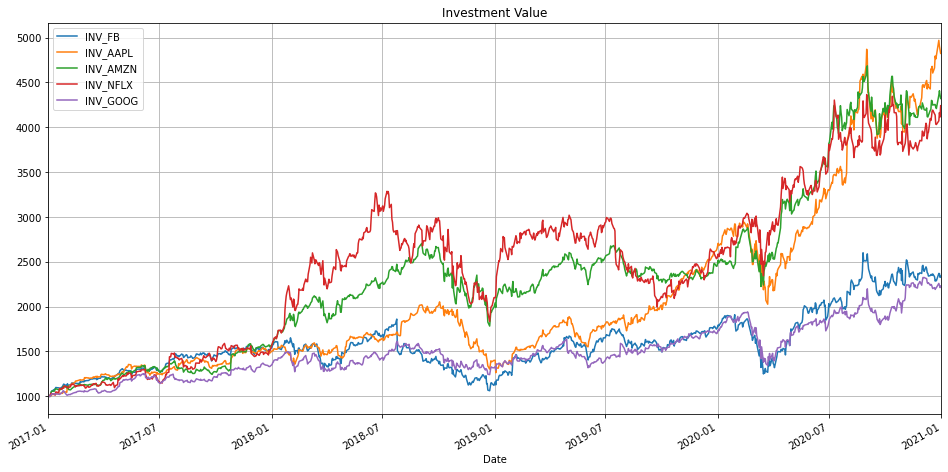

In [19]:
inv_val = pd.DataFrame()
for ticker in stock_lst:
    inv_val['INV_'+ticker] = (prices['PRC_'+ticker]/prices['PRC_'+ticker].iloc[0])*1000
inv_val.plot.line(figsize=(16,8), grid=True,
                 title='Investment Value', xlim = ('2017-01-01', '2021-01-01'));